In [3]:
import konlpy
import pandas as pd
import numpy as np

#txt파일을 tab을 딜리미터로 하여 불러오기
df_train=pd.read_csv('data/ratings_train.txt', delimiter = '\t', keep_default_na=False)
df_test=pd.read_csv('data/ratings_test.txt', delimiter = '\t', keep_default_na=False)

#train 데이터 data와 label로 분리
text_train = df_train['document']
y_train = df_train['label']

#test 데이터 data와 label로 분리
text_test = df_test['document']
y_test = df_test['label']

In [25]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

twitter_tag=Okt()

#normalization과 stemming을 하고 word[1]이 Josa, Eomi, Punctuation, Korean Particle인 경우에 삭제하고 리스트에 append하고 return하는
#tokenizer 정의
def twitter_tokenizer(text):
    malist = twitter_tag.pos(text,norm=True, stem=True)
    r=[]
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation", "KoreanParticle"]:
            r.append(word[0])
    return r

filtered_train=pd.Series([])
filtered_test=pd.Series([])

#text_train의 데이터를 반복하면서 twitter_tokenizer로 Josa, Eomi, Punctuation, Korean Particle를 삭제한후
#다시 형태소 사이에 빈 칸을 하나 넣고 join한 후 pandas Series로 형 변환후에 새로운 Series에 append시켰다.
for data in text_train:
    temp=pd.Series(' '.join(twitter_tokenizer(data)))
    filtered_train=filtered_train.append(temp, ignore_index=True)

#text_test의 데이터를 반복하면서 twitter_tokenizer로 Josa, Eomi, Punctuation, Korean Particle를 삭제한후
#다시 형태소 사이에 빈 칸을 하나 넣고 join한 후 pandas Series로 형 변환후에 새로운 Series에 append시켰다.
for data in text_test:
    temp=pd.Series(' '.join(twitter_tokenizer(data)))
    filtered_test=filtered_test.append(temp, ignore_index=True)

<ipython-input-25-5fa063ca0178>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filtered_train=pd.Series([])
<ipython-input-25-5fa063ca0178>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filtered_test=pd.Series([])


In [20]:
print("Josa, Eomi, Punctuation, Korean Particle 삭제 전")
print(text_test[0:5])

print()

print("Josa, Eomi, Punctuation, Korean Particle 삭제 후")
print(filtered_test[0:5])


#2번째 인덱스를 보면 ' 뭐야 이 평점들은.... 나쁘진 않지만'이 '뭐 이 평점 들 나쁘다 않다'가 되었다
#따라서 "야", ","과 같은 조사, 어미 punctuation, KoreanParticle은 제거가 된 모습이고 
#'나쁘진'이 형용사의 기본형인 '나쁘다'가 되었다.

Josa, Eomi, Punctuation, Korean Particle 삭제 전
0                                                  굳 ㅋ
1                                 GDNTOPCLASSINTHECLUB
2               뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                     지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4    3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
Name: document, dtype: object

Josa, Eomi, Punctuation, Korean Particle 삭제 후
0                                              굳다
1                            GDNTOPCLASSINTHECLUB
2              뭐 이 평점 들 나쁘다 않다 10 점 짜다 리 더 더욱 아니다
3                         지루하다 않다 완전 막장 임 돈 주다 보기
4    3 D 만 아니다 별 다섯 개 주다 왜 3 D 로 나오다 제 심기 불편하다 하다
dtype: object


In [21]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

twitter_tag=Okt()

#Josa, Eomi, Punctuation, Korean Particle를 삭제하는 tokenizer 정의
def twitter_tokenizer(text):
    malist = twitter_tag.pos(text,norm=True, stem=True)
    r=[]
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation", "KoreanParticle"]:
            r.append(word[0])
    return r

#TfidfVectorizer를 사용하여 BOW 생성
vect=TfidfVectorizer(tokenizer=twitter_tokenizer).fit(text_train)

C:\Users\choeunhak\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [29]:
x_train=vect.transform(text_train)

#BOW의 일부를 sparse matrix 형태로 출력
print(x_train[0:3], "\n")

#BOW의 일부를 array 형태로 출력
print(x_train[0:3].toarray())

  (0, 37720)	0.45785907908518
  (0, 37494)	0.3043279726856257
  (0, 26275)	0.37510430072242007
  (0, 16655)	0.5396067903097983
  (0, 11843)	0.5156266325272867
  (1, 46005)	0.3948219173669031
  (1, 42674)	0.3522650790151567
  (1, 38884)	0.36713758055435725
  (1, 36778)	0.309200714156536
  (1, 29661)	0.4233878861081901
  (1, 29354)	0.12111034807737996
  (1, 29020)	0.22562831303223427
  (1, 27015)	0.21424311144041985
  (1, 19632)	0.2409765070504278
  (1, 4169)	0.375269158174095
  (2, 39282)	0.24341478139264053
  (2, 19663)	0.10585486079731403
  (2, 17905)	0.5070257916043699
  (2, 17098)	0.4782784452334599
  (2, 14027)	0.4158988596181004
  (2, 10898)	0.4039676328694152
  (2, 10887)	0.18341423585008926
  (2, 9961)	0.2718751117111555 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#Multinomial Naive Bayesian classification을 사용하여 분류 모델을 train 시킴
clf_mult=MultinomialNB().fit(x_train,y_train)

x_test = vect.transform(text_test)

#x_test로 predict 실행
pre=clf_mult.predict(x_test)

#정답률 산출 및 소수점 둘째짜리에서 반올림
ac_score=metrics.accuracy_score(y_test,pre)
print("정답률 = ", round(ac_score, 1))

정답률 =  0.8


In [36]:
#알파값을 1.0부터 0.01씩 더해가면서 알파값과 정답률을 출력하면서 확인
x=1.0

for i in range(300):
    nb=MultinomialNB(alpha=x)
    nb.fit(x_train, y_train)
    pre=nb.predict(x_test)
    ac_score=metrics.accuracy_score(y_test,pre)
    x=x+0.01
    print("알파값", round(x,2), "정답률", ac_score)
    i=i+1

print()
print("최적의 정답률 일때 알파값 = ", 2.44, "최적의 정답률 = ", 0.83926)

알파값 1.01 정답률 0.83748
알파값 1.02 정답률 0.8376
알파값 1.03 정답률 0.83778
알파값 1.04 정답률 0.83768
알파값 1.05 정답률 0.8377
알파값 1.06 정답률 0.8378
알파값 1.07 정답률 0.83778
알파값 1.08 정답률 0.83778
알파값 1.09 정답률 0.83776
알파값 1.1 정답률 0.83778
알파값 1.11 정답률 0.8378
알파값 1.12 정답률 0.83784
알파값 1.13 정답률 0.83778
알파값 1.14 정답률 0.83782
알파값 1.15 정답률 0.83786
알파값 1.16 정답률 0.8379
알파값 1.17 정답률 0.83798
알파값 1.18 정답률 0.83808
알파값 1.19 정답률 0.83818
알파값 1.2 정답률 0.83822
알파값 1.21 정답률 0.83824
알파값 1.22 정답률 0.8383
알파값 1.23 정답률 0.83824
알파값 1.24 정답률 0.83818
알파값 1.25 정답률 0.83824
알파값 1.26 정답률 0.8382
알파값 1.27 정답률 0.83826
알파값 1.28 정답률 0.8383
알파값 1.29 정답률 0.8383
알파값 1.3 정답률 0.83836
알파값 1.31 정답률 0.83838
알파값 1.32 정답률 0.83842
알파값 1.33 정답률 0.83844
알파값 1.34 정답률 0.83846
알파값 1.35 정답률 0.83856
알파값 1.36 정답률 0.83862
알파값 1.37 정답률 0.8386
알파값 1.38 정답률 0.83858
알파값 1.39 정답률 0.83862
알파값 1.4 정답률 0.83856
알파값 1.41 정답률 0.83854
알파값 1.42 정답률 0.83852
알파값 1.43 정답률 0.83852
알파값 1.44 정답률 0.83858
알파값 1.45 정답률 0.8386
알파값 1.46 정답률 0.83858
알파값 1.47 정답률 0.83854
알파값 1.48 정답률 0.83854
알파값 1.4

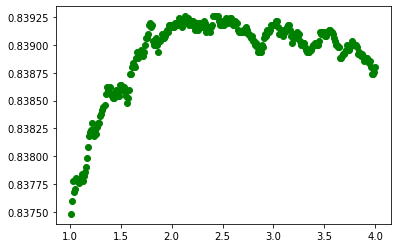

In [37]:
from matplotlib import pyplot as plt
import numpy as np


#알파값을 1.0부터 0.01씩 더해가면서 알파값과 정답률을 numpy array에 append시키고 점그래프로 시각화
x=1.0
x1=np.array([])
y1=np.array([])

ans=0
for i in range(300):
    nb=MultinomialNB(alpha=x)
    nb.fit(x_train, y_train)
    pre=nb.predict(x_test)
    ac_score=metrics.accuracy_score(y_test,pre)
    x=x+0.01
    x1 = np.append(x1, np.array([x]))
    y1 = np.append(y1, np.array([ac_score]))
    i=i+1
plt.plot(x1,y1,'go')
plt.show()